In [6]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
library(readxl)

In [7]:
#read_excel("data/data.xlsx")
data1<-read_csv("data/data.csv", skip=1)
 colnames(data1)<-make.names(colnames(data1))

data1

New names:
• `Total # eggs` -> `Total # eggs...3`
• `Total # eggs fertilized` -> `Total # eggs fertilized...4`
• `Features of fertilization` -> `Features of fertilization...5`
• `% fertilization` -> `% fertilization...6`
• `` -> `...7`
• `Total # eggs` -> `Total # eggs...8`
• `Total # eggs fertilized` -> `Total # eggs fertilized...9`
• `Features of fertilization` -> `Features of fertilization...10`
• `% fertilization` -> `% fertilization...15`
Rows: 83 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Student ID, Total # eggs...3, Features of fertilization...5, % fert...
dbl (7): Total magnification, Total # eggs fertilized...4, Total # eggs...8,...
lgl (2): ...7, Total eggs at 8-cell stage

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Student.ID,Total.magnification,Total...eggs...3,Total...eggs.fertilized...4,Features.of.fertilization...5,X..fertilization...6,...7,Total...eggs...8,Total...eggs.fertilized...9,Features.of.fertilization...10,Total.eggs.with.cleavage.furrow,Total.eggs.at.2.cell.stage,Total.eggs.at.4.cell.stage,Total.eggs.at.8.cell.stage,X..fertilization...15
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>
1,12.5,20,11,- dark spot -> sperm entry - animal pole facing up,55,NA,9,4,- dark spot -> sperm entry - animal pole facing up - cleavage,NA,1,0,NA,44.44444444
2,12.5,13,6,- dark spot -> sperm entry - animal pole facing up,46.15384615,NA,28,17,- dark spot -> sperm entry - animal pole facing up - cleavage,NA,2,1,NA,60.71428571
3,12.5,5,0,"cleavage furrow, fertilization envelope, 2 cell stage, orientation, colour",0,NA,10,0,NA,0,0,0,NA,0.00%
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [8]:
data2<-read_csv("data/data2.csv", skip=1)
 colnames(data2)<-make.names(colnames(data2))
data2<-data2|>
    select(Incubation.temperature, Total...embryos.in.dish, Max..developmental.stage.reached)|>
        mutate(Total...embryos.in.dish=as.numeric(Total...embryos.in.dish))
data2
a<-data2|>group_by(Incubation.temperature)|>summarize(sum=sum(Total...embryos.in.dish))
a

data22<-data2|> group_by(Incubation.temperature,Max..developmental.stage.reached)|>
summarize(sum=sum(Total...embryos.in.dish))
data22


New names:
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
Rows: 71 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Student ID, Total # embryos in dish, Max. developmental stage reach...
dbl (1): Incubation temperature
lgl (4): ...6, ...7, ...8, ...9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Incubation.temperature,Total...embryos.in.dish,Max..developmental.stage.reached
<dbl>,<dbl>,<chr>
18,13,7 to 8
18,28,7 to 8
18,30,N/A
⋮,⋮,⋮
23,33,7 to 8
NA,NA,NA
NA,NA,NA


Incubation.temperature,sum
<dbl>,<dbl>
18,571
23,543
NA,NA


`summarise()` has grouped output by 'Incubation.temperature'. You can override
using the `.groups` argument.


Incubation.temperature,Max..developmental.stage.reached,sum
<dbl>,<chr>,<dbl>
18,7 to 8,527
18,N/A,44
23,7 to 8,501
23,N/A,42
NA,NA,NA


In [9]:
data3<-read_csv("data/data3.csv", skip=1)
 colnames(data3)<-make.names(colnames(data3))
data3<-data3|>select(Time.of.observation:Max..developmental.stage.reached)
data3
#b<-data3|>group_by(Incubation.temperature)|>summarize(sum=sum(Total...embryos.at.each.stage))
#b
#data33<-data3|> group_by(Incubation.temperature,Max..developmental.stage.reached)|>
#summarize(sum=sum(Total...embryos.in.dish))
#data33

#data333<-data3|> mutate(Max..developmental.stage.reached = stringr::str_remove(Max..developmental.stage.reached, pattern = "\\s"))
#group_by(Max..developmental.stage.reached)|>summarize(sum=sum(Total...embryos.in.dish))
#data333



New names:
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
Rows: 39 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Lab section, Time of observation, Max. developmental stage reached,...
dbl (2): Incubation temperature, Total # embryos at each stage
lgl (3): ...9, ...10, ...11

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Time.of.observation,Incubation.temperature,Total...embryos.at.each.stage,Max..developmental.stage.reached
<chr>,<dbl>,<dbl>,<chr>
24 hrs post-fertilization (p.f.),18,5,11 to 11.5
24 hrs p.f.,18,21,12 to 12.5
24 hrs p.f.,23,6,19 to 20
⋮,⋮,⋮,⋮
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA


In [10]:
data333<-data3|> mutate(Max..developmental.stage.reached = stringr::str_remove(Max..developmental.stage.reached, pattern = "\\s"))
#group_by(Max..developmental.stage.reached)|>summarize(sum=sum(Total...embryos.in.dish))

data333<-data333|> mutate(Max..developmental.stage.reached = stringr::str_remove(Max..developmental.stage.reached, pattern = "\\s"))
#group_by(Max..developmental.stage.reached)|>summarize(sum=sum(Total...embryos.in.dish))
data333
data18<-data333|>if(Incubation.temperature==18) {mutate(Total...embryos.at.each.stage=Total...embryos.at.each.stage/597)}
else {mutate(Total...embryos.at.each.stage=Total...embryos.at.each.stage/5}

data34<-data333|> group_by(Max..developmental.stage.reached,Incubation.temperature)|>
summarize(sum=sum(Total...embryos.at.each.stage))#|>
#filter(Max..developmental.stage.reached != NA)
data34

ERROR: Error in parse(text = x, srcfile = src): function 'if' not supported in RHS call of a pipe


# pearson chi sq contengency table
# survial rate for 23 vs 18 

In [11]:
df<-data.frame(
    "Temprature"=c("18C","23C"),
    "Lost"=c(571,543),
    "Alive"=c(26,17)
    )


df2<-data.frame(
    "Temprature"=c("18C","23C"),
    "Lost%"=c(571/597,543/560),
    "Alive%"=c(26/597,17/560),
    "Total"=c(597,560)
    )

modifiedDf<-as.matrix(df)
modifiedDf
df2
datatable <- matrix(c(571,543,26,17),nrow=2,ncol=2)
datatable
#datatable
chisq.test(datatable,correct=FALSE)

#table<-as.table(modifiedDf)
#modifiedDf
#table

df2<-data.frame(
    "Temprature"=c("18C","23C","18C","23C"),
    "percent"=c(571/597,543/560,26/597,17/560),
    "Stat"=c('dead','dead', 'live','live')
    )
#mosaicplot(table)
#chisq.test(table)

Temprature,Lost,Alive
18C,571,26
23C,543,17


Temprature,Lost.,Alive.,Total
<chr>,<dbl>,<dbl>,<dbl>
18C,0.9564489,0.04355109,597
23C,0.9696429,0.03035714,560


571,26
543,17



	Pearson's Chi-squared test

data:  datatable
X-squared = 1.4057, df = 1, p-value = 0.2358


In [12]:
df3<-data.frame(
    "Temperature"=c("18C","23C","18C","23C"),
    "percent"=c(571/597,543/560,26/597,17/560),
    "Stat"=c('dead','dead', 'live','live')
    )
df3

Temperature,percent,Stat
<chr>,<dbl>,<chr>
18C,0.95644891,dead
23C,0.96964286,dead
18C,0.04355109,live
23C,0.03035714,live


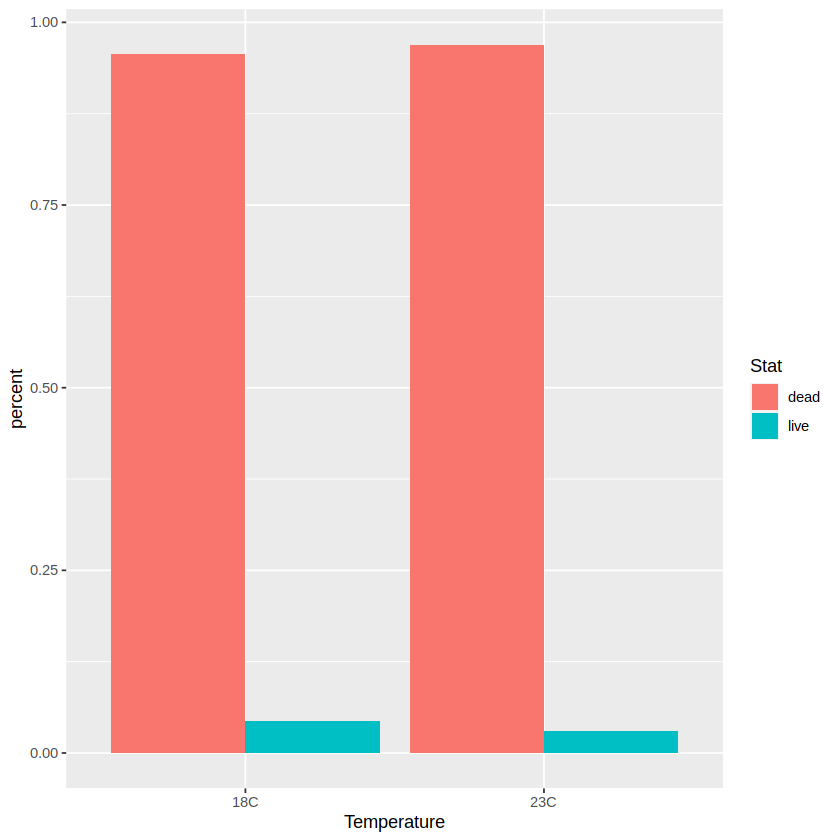

In [13]:
ggplot(df3, aes(x=Temperature, y=percent, fill=Stat))+
geom_bar(stat="identity", position = position_dodge())


different degrees do not affect the death rate 